# Evaluating Tikhonet Trained

In this Notebook we are going to evaluate the performance of a [Tikhonet](https://arxiv.org/pdf/1911.00443.pdf) trained.

## Required Libraries and Functions

In [1]:
%matplotlib inline
import sys

# Add library path to PYTHONPATH
lib_path = '/gpfswork/rech/xdy/uze68md/GitHub/'
path_alphatransform = lib_path+'alpha-transform'
path_score = lib_path+'score'
sys.path.insert(0, path_alphatransform)
sys.path.insert(0, path_score)
data_path = '/gpfswork/rech/xdy/uze68md/data/'
model_dir = '/gpfswork/rech/xdy/uze68md/trained_models/model_meerkat_64/'

# Function
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import fft
import cadmos_lib as cl
import tensorflow as tf
import galsim
from galsim import Image
import galsim.hsm
import pickle

## Load the Evaluation Dataset

In [2]:
f = open(data_path+"meerkat_batch.pkl", "rb")
batch = pickle.load(f)
f.close()

## Extract Batches and Concatenate Them

In [3]:
batch.keys()
n_batch, Nx, Ny = batch['targets'].shape
snr = np.array([np.max(gal) / cl.sigma_mad(gal) for gal in batch['inputs']])

## Plot Galaxy Images

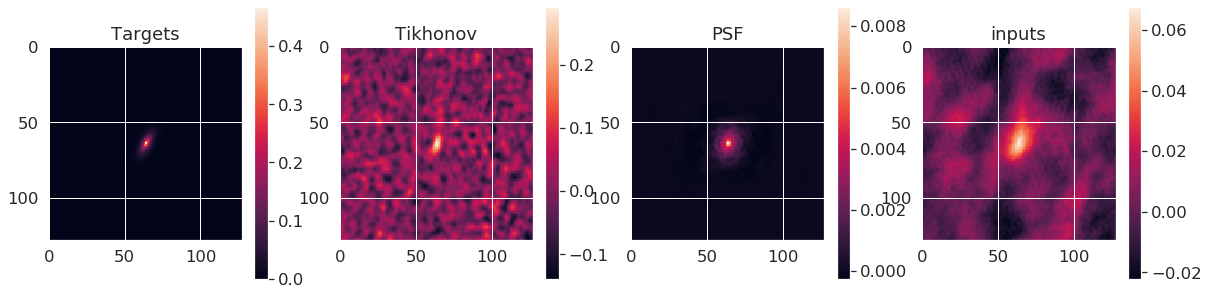

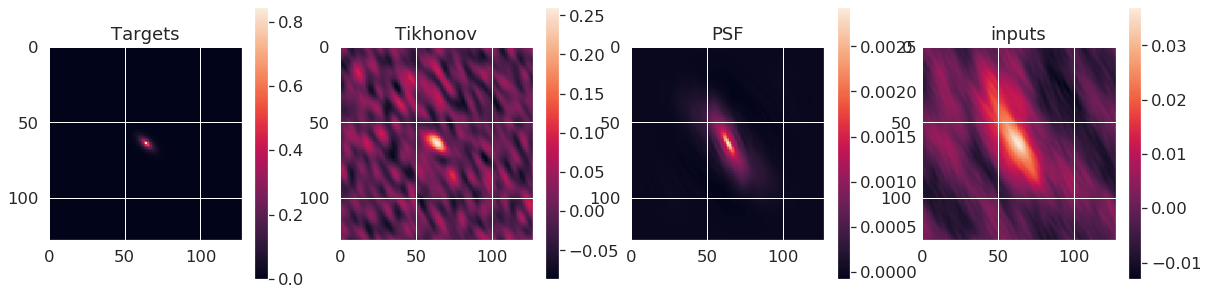

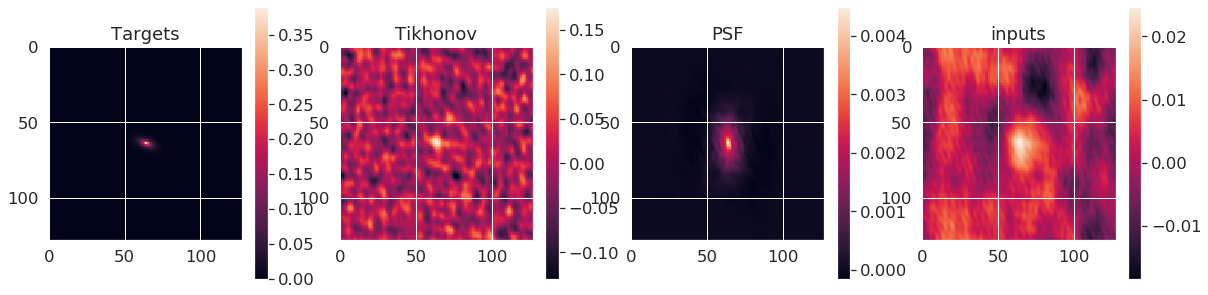

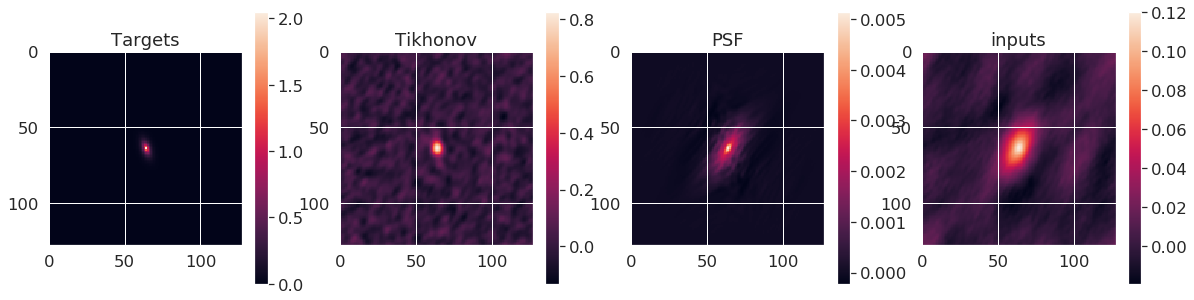

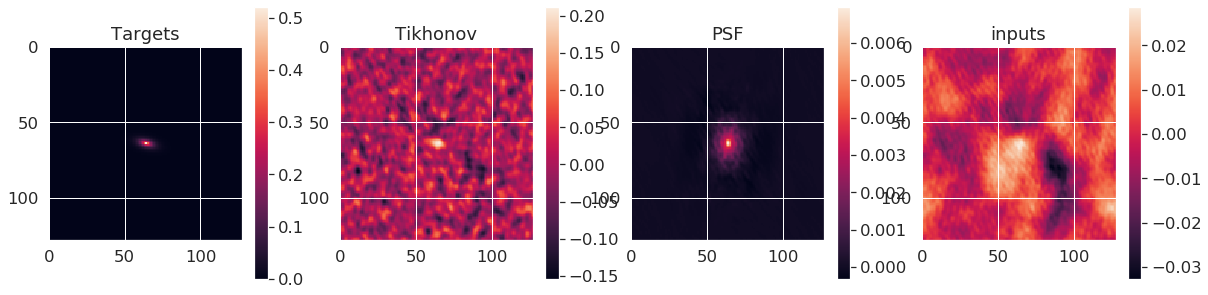

In [4]:
# set seaborn theme and style
sns.set_theme()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i in range(5):#n_batch):
    plt.figure(33,figsize=(20,5))
    plt.subplot(141)
    plt.imshow(batch['targets'][i])
    plt.title('Targets')
    plt.colorbar()
    plt.subplot(142)
    plt.imshow(batch['inputs_tikho'][i])
    plt.title('Tikhonov')
    plt.colorbar()
    plt.subplot(143)
    plt.imshow(batch['psf'][i])
    plt.title('PSF')
    plt.colorbar()
    plt.subplot(144)
    plt.imshow(batch['inputs'][i])
    plt.title('inputs')
    plt.colorbar()
    plt.show()

## Load and Apply Trained Model on Batch

In [5]:
g = open(data_path+"clean_results.pkl", "rb")
clean = pickle.load(g)
g.close()

clean.keys()

dict_keys(['restored_residual', 'restored', 'restored_isotropic', 'residual', 'skymodel', 'skymodel_list', 'sigma_flags'])

In [6]:
# load Tikhonet results
model_name_g0 = 'tikhonet_None-constraint_scales-4_steps-3125_epochs-10_growth_rate-12_batch_size-32_activationfunction-relu'
model_name_g05 = 'tikhonet_multi-constraint_scales-4_gamma-0.5_shearlet-3_steps-3125_epochs-10_growth_rate-12_batch_size-32_activationfunction-relu'

model_g0 = tf.keras.models.load_model(model_dir+model_name_g0, compile=False)
model_g05 = tf.keras.models.load_model(model_dir+model_name_g05, compile=False)

inputs_model = np.expand_dims(np.array([crop_center(im,64,64) for im in batch['inputs_tikho']]),axis=-1)

res_g0 = model_g0(inputs_model)
res_g05 = model_g05(inputs_model)

res_g0 = np.array([np.pad(im,32,constant_values=0) for im in tf.keras.backend.eval(res_g0)[...,0]])#np.pad(tf.keras.backend.eval(res_g0)[...,0], 32, constant_values=0)
res_g05 = np.array([np.pad(im,32,constant_values=0) for im in tf.keras.backend.eval(res_g05)[...,0]])#np.pad(tf.keras.backend.eval(res_g05)[...,0], 32, constant_values=0)

# load CLEAN
res_cl = clean['restored']
res_cl_iso = clean['restored_isotropic']

# load SCORE
res_s0 = np.load(data_path+'score_radio_tikho_g0_1.npy')
res_s2 = np.load(data_path+'score_radio_tikho_g05_1.npy')

for i in range(3):
    res_s0 = np.concatenate((res_s0,np.load(data_path+'score_radio_tikho_g0_{}.npy'.format(i+2))), axis=0)
    res_s2 = np.concatenate((res_s2,np.load(data_path+'score_radio_tikho_g05_{}.npy'.format(i+2))), axis=0)
res_s0 = np.array(res_s0)
res_s2 = np.array(res_s2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Crop images to 64x64

In [7]:
# batch['inputs_tikho'] = np.array([crop_center(im,64,64) for im in batch['inputs_tikho']])
# batch['inputs'] = np.array([crop_center(im,64,64) for im in batch['inputs']])
# batch['targets'] = np.array([crop_center(im,64,64) for im in batch['targets']])
# res_g0 = np.array([crop_center(im,64,64) for im in res_g0])
# res_g05 = np.array([crop_center(im,64,64) for im in res_g05])
# res_cl = np.array([crop_center(im,64,64) for im in res_cl])
# res_cl_iso = np.array([crop_center(im,64,64) for im in res_cl_iso])
# res_s0 = np.array([crop_center(im,64,64) for im in res_s0])
# res_s2 = np.array([crop_center(im,64,64) for im in res_s2])

# # flag galaxies where clean did not detect signal
# batch['inputs_tikho'] = batch['inputs_tikho'][clean['sigma_flags']]
# batch['inputs'] = batch['inputs'][clean['sigma_flags']]
# batch['targets'] = batch['targets'][clean['sigma_flags']]
# res_g0 = res_g0[clean['sigma_flags']]
# res_g05 = res_g05[clean['sigma_flags']]
# res_cl = res_cl[clean['sigma_flags']]
# res_cl_iso = res_cl_iso[clean['sigma_flags']]
# res_s0 = res_s0[clean['sigma_flags']]
# res_s2 = res_s2[clean['sigma_flags']]

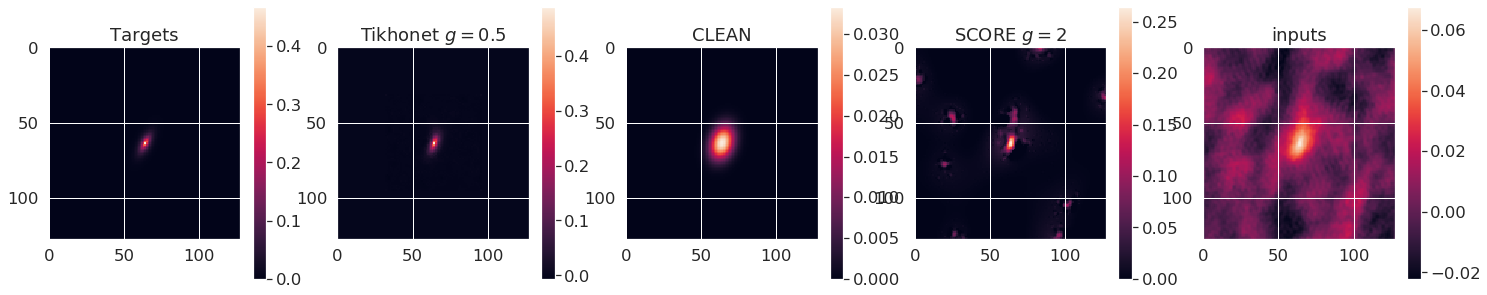

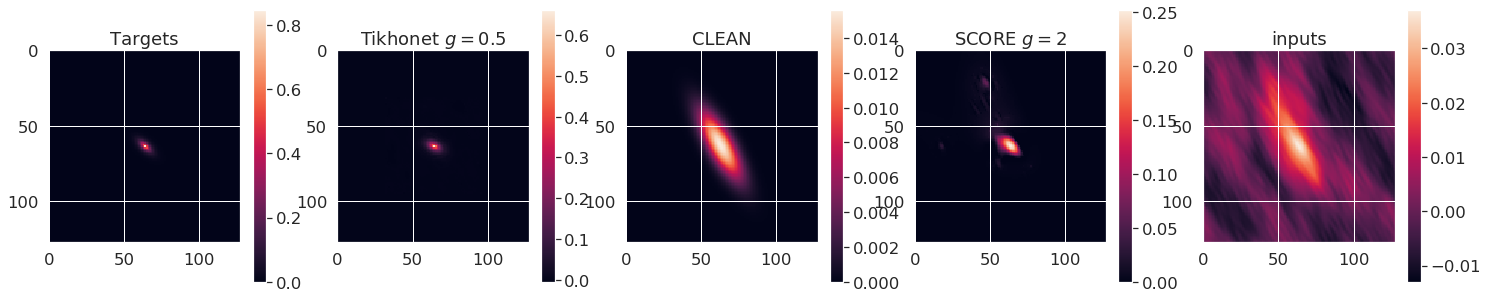

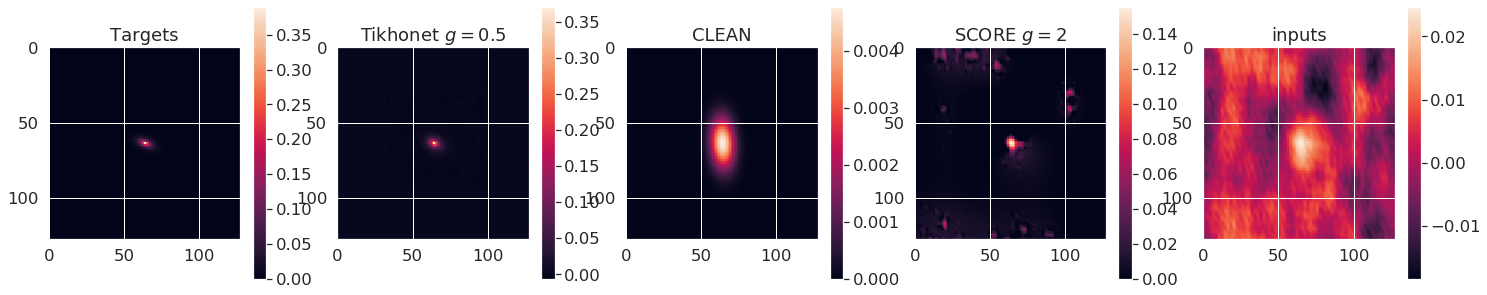

In [ ]:
for i in range(20):#n_batch):
    plt.figure(33,figsize=(25,5))
    plt.subplot(151)
    plt.imshow(batch['targets'][i])
    plt.title('Targets')
    plt.colorbar()
    plt.subplot(152)
    plt.imshow(res_g05[i])
    plt.title(r'Tikhonet $g=0.5$')
    plt.colorbar()
    plt.subplot(153)
    plt.imshow(res_cl[i])
    plt.title('CLEAN')
    plt.colorbar()
    plt.subplot(154)
    plt.imshow(res_s0[i])
    plt.title('SCORE $g=2$')
    plt.colorbar()
    plt.subplot(155)
    plt.imshow(batch['inputs'][i])
    plt.title('inputs')
    plt.colorbar()
    plt.show()

In [ ]:
for i in range(20):#n_batch):
    plt.figure(33,figsize=(20,5))
    plt.subplot(141)
    plt.imshow(batch['targets'][i])
    plt.title('Targets')
    plt.colorbar()
    plt.subplot(142)
    plt.imshow(res_g05[i])
    plt.title(r'$g=0.5$')
    plt.colorbar()
    plt.subplot(143)
    plt.imshow(res_g0[i])
    plt.title(r'$g=0$')
    plt.colorbar()
    plt.subplot(144)
    plt.imshow(batch['inputs'][i])
    plt.title('inputs')
    plt.colorbar()
    plt.show()

In [ ]:
for i in range(20):#n_batch):
    plt.figure(33,figsize=(20,5))
    plt.subplot(141)
    plt.imshow(batch['targets'][i])
    plt.title('Targets')
    plt.colorbar()
    plt.subplot(142)
    plt.imshow(res_cl[i])#res_g05[i])
    plt.title(r'CLEAN')
    plt.colorbar()
    plt.subplot(143)
    plt.imshow(res_cl_iso[i])#res_g0[i])
    plt.title(r'CLEAN ISO')
    plt.colorbar()
    plt.subplot(144)
    plt.imshow(batch['inputs'][i])
    plt.title('inputs')
    plt.colorbar()
    plt.show()

### Save Samples

In [ ]:
batch.keys()

In [ ]:
clean.keys()

In [ ]:
# choose 5 galaxies
i_f = [0,1,2,3,5]
i_s = [0,1,2,3,4]

keys = ['inputs', 
        'inputs_tikho',
        'targets',
        'psf',
        'snr',
        'clean',
        'clean_iso',
        'skymodel',
        'sparsity',
        'score',
        'tikhonet',
        'tikhonet_sc']
values = [batch['inputs'],
          batch['inputs_tikho'],
          batch['targets'],
          batch['psf'],
          snr,
          res_cl,
          res_cl_iso,
          clean['skymodel'],
          res_s0,
          res_s2,
          res_g0,
          res_g05]


examples = {}

examples['flagged'] = {}
examples['unflagged'] = {}
for key, value in zip(keys, values):
    examples['flagged'][key] = np.take(value[np.logical_not(clean['sigma_flags'])],i_f,axis=0)
    examples['unflagged'][key] = np.take(value[clean['sigma_flags']],i_s,axis=0)


In [ ]:
# save dictionnary
f = open(data_path+"meerkat3600_examples.pkl","wb")
pickle.dump(examples,f)
f.close()

In [ ]:
# sanity check
f = open(data_path+"meerkat3600_examples.pkl", "rb")
test = pickle.load(f)
f.close()

In [ ]:
np.all(test['unflagged']['inputs'][0] == batch['inputs'][clean['sigma_flags']][0])